In [2]:
from ray import tune
import pandas as pd
import json
import os

In [24]:
%matplotlib inline

In [3]:
## list dir for directories
tf = os.listdir('/Users/mzvyagin/ray_results/mnist_tf_objective')

In [4]:
pt = os.listdir('/Users/mzvyagin/ray_results/mnist_pt_objective')

In [5]:
def dataframe_from_logs(logdir):
    dataframe = pd.DataFrame(columns=['test_loss','learning_rate','dropout','epochs','batch_size'])
    files = os.listdir(logdir)
    for f in files:
        if os.path.isdir(logdir+'/'+f):
            params_f = open(logdir+'/'+f+'/params.json')
            params = json.load(params_f)
            res_f = open(logdir+'/'+f+'/result.json')
            res = json.load(res_f)
            new_row = {}
            new_row['test_loss'] = res['test_loss']
            new_row['learning_rate'] = params['learning_rate']
            new_row['dropout'] = params['dropout']
            new_row['epochs'] = params['epochs']
            new_row['batch_size'] = params['batch_size']
            dataframe = dataframe.append(new_row, ignore_index=True)
    return dataframe

In [6]:
tf = dataframe_from_logs('/Users/mzvyagin/ray_results/mnist_tf_objective')

In [7]:
tf

,test_loss,learning_rate,dropout,epochs,batch_size
0,0.136997,0.006316,0.117402,46.0,416.0
1,0.365416,0.057161,0.425580,50.0,559.0
2,0.311119,0.079155,0.143750,29.0,567.0
3,0.404921,0.097201,0.077096,54.0,808.0
4,0.454970,0.066839,0.137307,72.0,575.0
...,...,...,...,...,...
275,0.920724,0.035066,0.760473,31.0,126.0
276,0.125804,0.003960,0.372627,89.0,413.0
277,0.492488,0.042180,0.785066,41.0,676.0
278,0.529360,0.085682,0.050756,72.0,540.0


In [8]:
pt = dataframe_from_logs('/Users/mzvyagin/ray_results/mnist_pt_objective')

In [9]:
pt

,test_loss,learning_rate,dropout,epochs,batch_size
0,1.712517,0.090540,0.732817,64.0,829.0
1,2.165447,0.044125,0.528727,79.0,28.0
2,1.692863,0.067292,0.781676,87.0,478.0
3,1.551285,0.014125,0.860359,66.0,457.0
4,2.303968,0.074211,0.341961,51.0,29.0
...,...,...,...,...,...
315,1.553483,0.041163,0.355372,82.0,390.0
316,1.539126,0.003202,0.868488,15.0,984.0
317,1.501361,0.028007,0.054094,60.0,795.0
318,1.639088,0.053775,0.225018,61.0,748.0


In [10]:
import hypertools as hyp

In [11]:
hyp.plot(tf, '.', ndims=2)

In [12]:
hyp.plot(pt, fmt = 'b.', ndims=2)

In [13]:
pt['framework'] = 'pytorch'

In [14]:
tf['framework'] = 'tensorflow'

In [15]:
all_results = pt.append(tf)

In [16]:
all_results

,test_loss,learning_rate,dropout,epochs,batch_size,framework
0,1.712517,0.090540,0.732817,64.0,829.0,pytorch
1,2.165447,0.044125,0.528727,79.0,28.0,pytorch
2,1.692863,0.067292,0.781676,87.0,478.0,pytorch
3,1.551285,0.014125,0.860359,66.0,457.0,pytorch
4,2.303968,0.074211,0.341961,51.0,29.0,pytorch
...,...,...,...,...,...,...
275,0.920724,0.035066,0.760473,31.0,126.0,tensorflow
276,0.125804,0.003960,0.372627,89.0,413.0,tensorflow
277,0.492488,0.042180,0.785066,41.0,676.0,tensorflow
278,0.529360,0.085682,0.050756,72.0,540.0,tensorflow


In [17]:
all_results.sort_values('test_loss')

,test_loss,learning_rate,dropout,epochs,batch_size,framework
153,0.065580,0.001300,0.107517,49.0,890.0,tensorflow
229,0.068100,0.002781,0.264912,29.0,980.0,tensorflow
225,0.076880,0.001640,0.270468,11.0,492.0,tensorflow
151,0.083348,0.006875,0.149847,15.0,494.0,tensorflow
252,0.090804,0.010475,0.390948,13.0,773.0,tensorflow
...,...,...,...,...,...,...
219,2.304028,0.074122,0.885004,56.0,372.0,tensorflow
254,2.356751,0.056608,0.378111,49.0,17.0,pytorch
256,2.362001,0.086327,0.482429,47.0,20.0,pytorch
257,2.362517,0.080366,0.279590,22.0,20.0,pytorch


In [18]:
#res_plot = hyp.plot([pt, tf], '.', ndims=3, legend=True, title="Test Loss Results for Hyperspace", reduce='Isomap')
res_plot = hyp.plot([pt, tf], '.', ndims=3, legend=True, title="Test Loss Results for Hyperspace")

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=1)

In [23]:
reduced_dims = pca.transform(all_results[['learning_rate', 'dropout', 'epochs', 'batch_size']])

In [26]:
all_results['pca'] = reduced_dims

In [27]:
all_results

,test_loss,learning_rate,dropout,epochs,batch_size,framework,pca
0,1.712517,0.090540,0.732817,64.0,829.0,pytorch,337.748001
1,2.165447,0.044125,0.528727,79.0,28.0,pytorch,-463.249989
2,1.692863,0.067292,0.781676,87.0,478.0,pytorch,-13.248939
3,1.551285,0.014125,0.860359,66.0,457.0,pytorch,-34.251734
4,2.303968,0.074211,0.341961,51.0,29.0,pytorch,-462.253705
...,...,...,...,...,...,...,...
275,0.920724,0.035066,0.760473,31.0,126.0,tensorflow,-365.256380
276,0.125804,0.003960,0.372627,89.0,413.0,tensorflow,-78.248658
277,0.492488,0.042180,0.785066,41.0,676.0,tensorflow,184.744943
278,0.529360,0.085682,0.050756,72.0,540.0,tensorflow,48.749093


In [28]:
import matplotlib.pyplot as plt

In [29]:
pt_with_pca = all_results[all_results['framework'] =='pytorch']

In [30]:
tf_with_pca = all_results[all_results['framework'] =='tensorflow']

### Plotting Hyperparameter Results

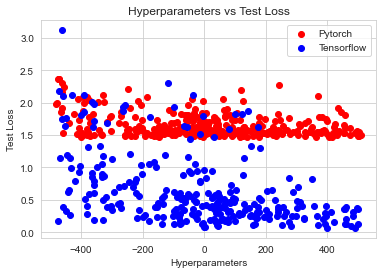

In [31]:
ax = plt.gca()
ax.scatter(pt_with_pca['pca'], pt_with_pca['test_loss'], color='red', label="Pytorch")
ax.scatter(tf_with_pca['pca'], tf_with_pca['test_loss'], color='blue', label="Tensorflow")
ax.set_title("Hyperparameters vs Test Loss")
ax.set_xlabel("Hyperparameters")
ax.set_ylabel("Test Loss")
ax.legend()
plt.show()

In [33]:
pt

,test_loss,learning_rate,dropout,epochs,batch_size,framework
0,1.712517,0.090540,0.732817,64.0,829.0,pytorch
1,2.165447,0.044125,0.528727,79.0,28.0,pytorch
2,1.692863,0.067292,0.781676,87.0,478.0,pytorch
3,1.551285,0.014125,0.860359,66.0,457.0,pytorch
4,2.303968,0.074211,0.341961,51.0,29.0,pytorch
...,...,...,...,...,...,...
315,1.553483,0.041163,0.355372,82.0,390.0,pytorch
316,1.539126,0.003202,0.868488,15.0,984.0,pytorch
317,1.501361,0.028007,0.054094,60.0,795.0,pytorch
318,1.639088,0.053775,0.225018,61.0,748.0,pytorch


In [34]:
tf

,test_loss,learning_rate,dropout,epochs,batch_size,framework
0,0.136997,0.006316,0.117402,46.0,416.0,tensorflow
1,0.365416,0.057161,0.425580,50.0,559.0,tensorflow
2,0.311119,0.079155,0.143750,29.0,567.0,tensorflow
3,0.404921,0.097201,0.077096,54.0,808.0,tensorflow
4,0.454970,0.066839,0.137307,72.0,575.0,tensorflow
...,...,...,...,...,...,...
275,0.920724,0.035066,0.760473,31.0,126.0,tensorflow
276,0.125804,0.003960,0.372627,89.0,413.0,tensorflow
277,0.492488,0.042180,0.785066,41.0,676.0,tensorflow
278,0.529360,0.085682,0.050756,72.0,540.0,tensorflow
